# EURONEXT LISBON - Forecasting with LSTM

### Preliminary Tasks

#### Importing Libraries

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dense
from keras.optimizers import Adam
from keras.optimizers import RMSprop
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error
import os

#### Model Parameters

In [96]:
LOOK_BACK = 90
PERIODS_TO_PREDICT = 50
BATCH_SIZE = 32
EPOCHS=5
LEARN_RATE=0.0005
VALIDATION_SPLIT=0.1
NUMBER_NEURONS=50
PERIOD='10y'
NUMBER_OF_LAYERS=2;

#### Loading data from Yahoo

In [97]:
#df = pd.DataFrame(yf.Ticker('PSI20.LS').history(period = PERIOD))
#df=df.truncate(after="2023-02-01")
#df.to_csv('stocks10y.csv')


In [98]:
#df = pd.read_csv('stocks.csv', index_col=0, parse_dates=True)
df = pd.read_csv('stocks10y.csv', index_col=0, parse_dates=True)


In [99]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2013-04-30 00:00:00+01:00,6277.990234,6289.279785,6205.089844,6248.520020,0,0,0
2013-05-02 00:00:00+01:00,6229.669922,6279.600098,6202.830078,6235.089844,0,0,0
2013-05-03 00:00:00+01:00,6222.720215,6257.470215,6188.990234,6253.540039,0,0,0
2013-05-06 00:00:00+01:00,6249.609863,6299.709961,6239.319824,6299.709961,0,0,0
2013-05-07 00:00:00+01:00,6318.540039,6384.779785,6318.540039,6356.560059,0,0,0
...,...,...,...,...,...,...,...
2023-01-26 00:00:00+00:00,5923.089844,5976.750000,5917.790039,5961.770020,127496000,0,0
2023-01-27 00:00:00+00:00,5954.439941,5956.859863,5925.200195,5936.729980,69082900,0,0
2023-01-30 00:00:00+00:00,5908.270020,5917.919922,5873.939941,5876.200195,66985300,0,0


In [100]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2013-04-30 00:00:00+01:00,6277.990234,6289.279785,6205.089844,6248.520020,0,0,0
2013-05-02 00:00:00+01:00,6229.669922,6279.600098,6202.830078,6235.089844,0,0,0
2013-05-03 00:00:00+01:00,6222.720215,6257.470215,6188.990234,6253.540039,0,0,0
2013-05-06 00:00:00+01:00,6249.609863,6299.709961,6239.319824,6299.709961,0,0,0
2013-05-07 00:00:00+01:00,6318.540039,6384.779785,6318.540039,6356.560059,0,0,0
...,...,...,...,...,...,...,...
2023-01-26 00:00:00+00:00,5923.089844,5976.750000,5917.790039,5961.770020,127496000,0,0
2023-01-27 00:00:00+00:00,5954.439941,5956.859863,5925.200195,5936.729980,69082900,0,0
2023-01-30 00:00:00+00:00,5908.270020,5917.919922,5873.939941,5876.200195,66985300,0,0


### EDA - Exploratory Data Analysis

<AxesSubplot: xlabel='y(t)', ylabel='y(t + 1)'>

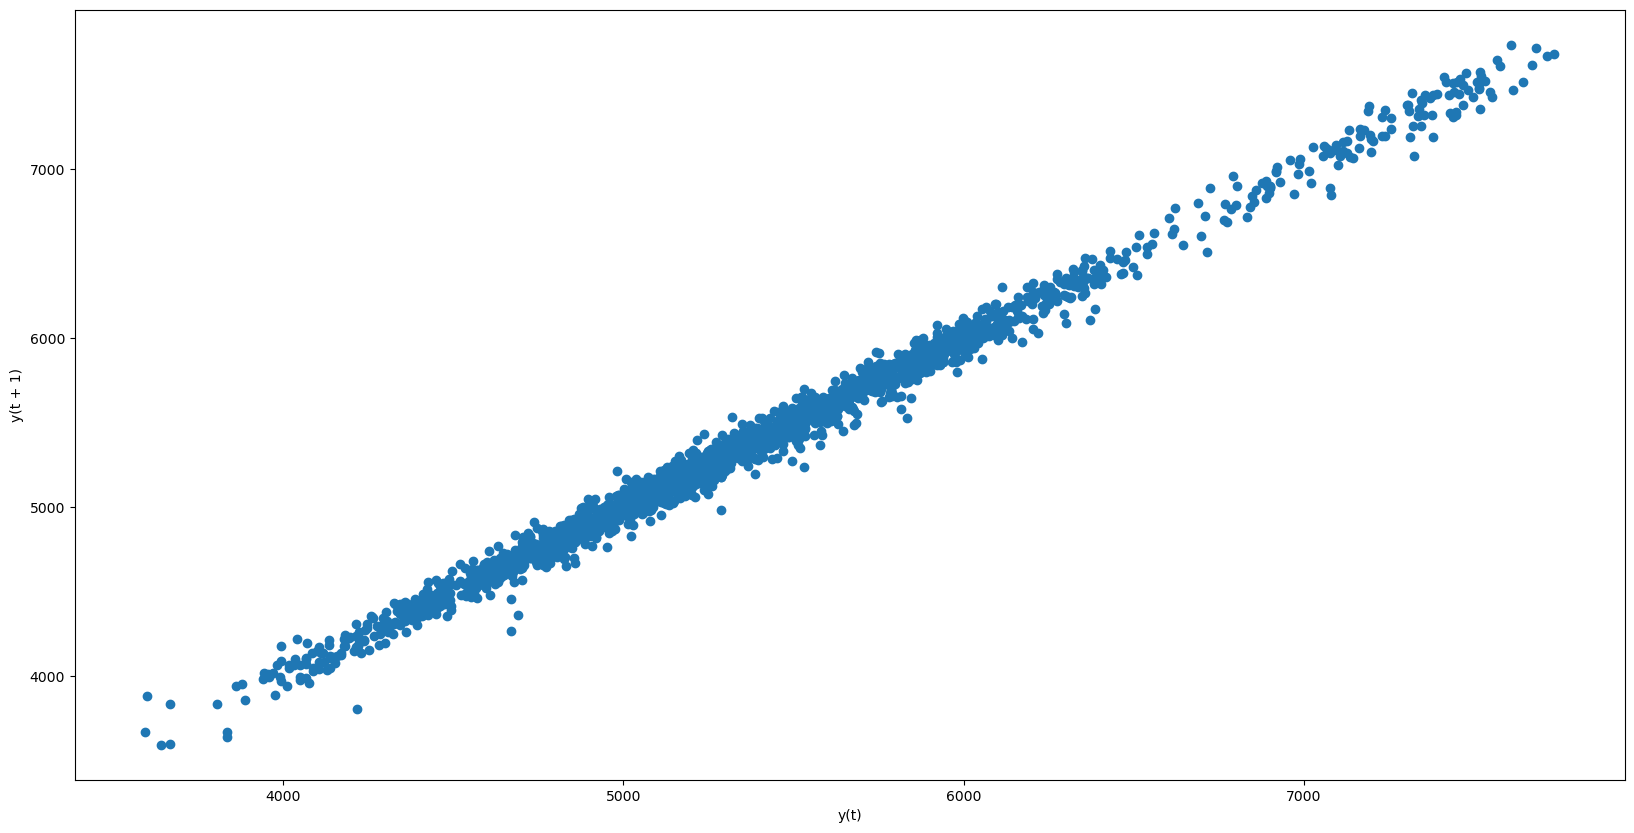

In [101]:
from pandas.plotting import lag_plot
lag_plot(df['Close'])

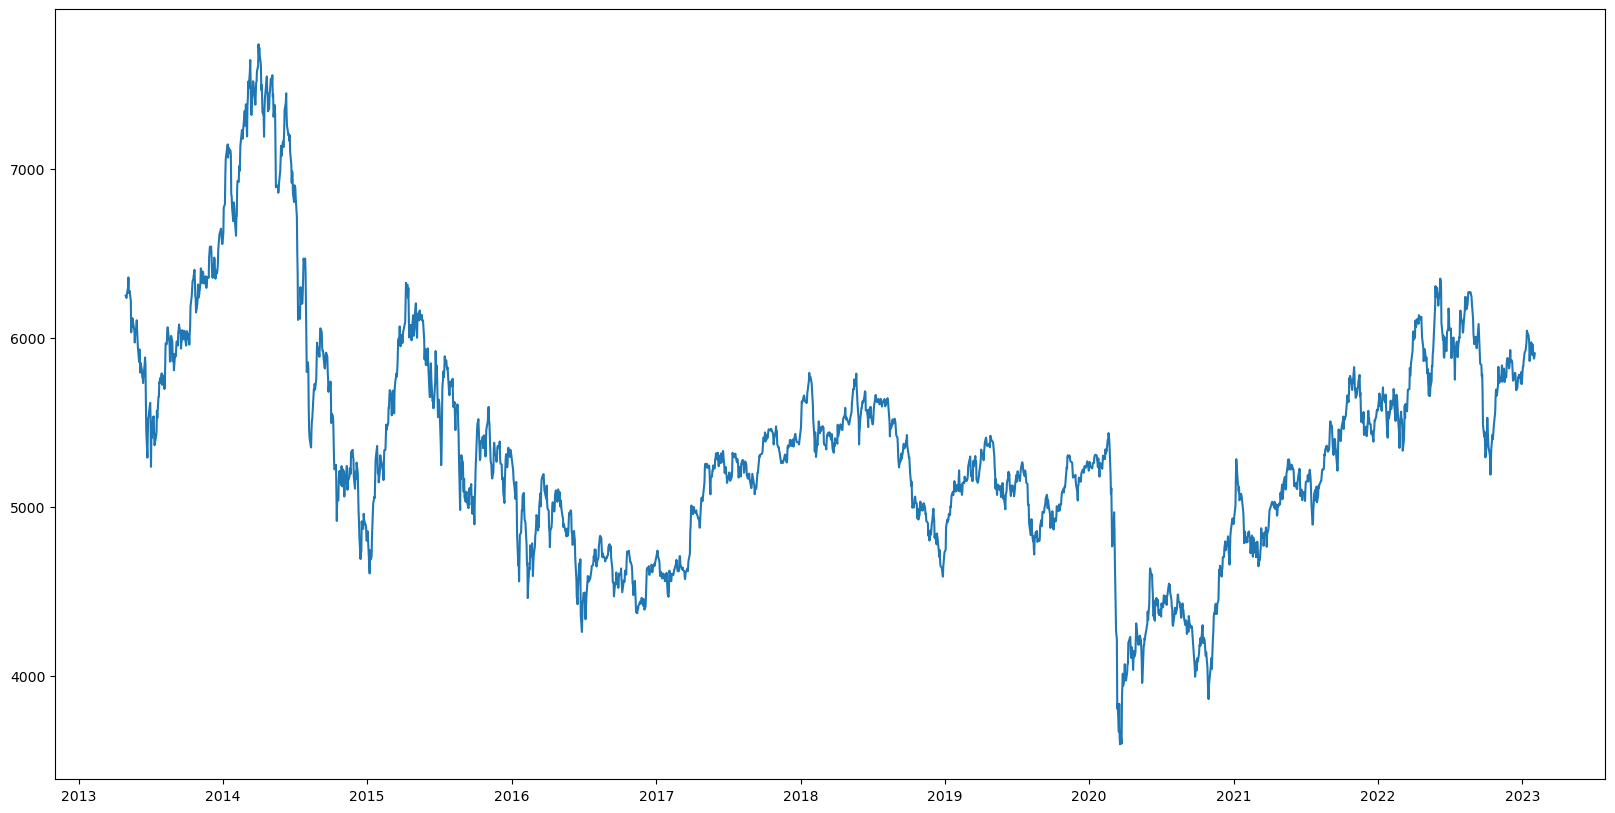

In [102]:
plt.plot(df['Close'])

In [103]:
df.describe()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,2487.000000,2487.000000,2487.000000,2487.000000,2.487000e+03,2487.0,2487.0
mean,5359.785471,5393.028949,5322.579992,5357.714244,1.052302e+08,0.0,0.0
std,681.798154,684.869361,676.923560,681.551797,1.969420e+08,0.0,0.0
min,3554.699951,3613.669922,3500.020020,3596.080078,0.000000e+00,0.0,0.0
25%,4943.090088,4975.674805,4902.780029,4933.604980,0.000000e+00,0.0,0.0
50%,5280.209961,5310.620117,5255.109863,5283.649902,5.779850e+07,0.0,0.0
75%,5706.635010,5747.599854,5667.614990,5705.209961,1.050409e+08,0.0,0.0
max,7770.290039,7790.560059,7669.669922,7734.950195,3.555048e+09,0.0,0.0


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2487 entries, 2013-04-30 00:00:00+01:00 to 2023-02-01 00:00:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2487 non-null   float64
 1   High          2487 non-null   float64
 2   Low           2487 non-null   float64
 3   Close         2487 non-null   float64
 4   Volume        2487 non-null   int64  
 5   Dividends     2487 non-null   int64  
 6   Stock Splits  2487 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 155.4+ KB


### Setting the Model

##### Data Preparation

In [105]:
#Dropping unwanted columns
def selectData(type='univariate') :
    if type=='univariate' :
        data = df.drop(columns=['Open', 'High', 'Low','Volume','Dividends','Stock Splits'])
    else :
        data = df.drop(columns=['Open', 'High', 'Low','Dividends','Stock Splits'])
    size = len(data) - PERIODS_TO_PREDICT
    return data, size

In [106]:
# Divides Data into Train Data and Test Data
def divideData(data, size) : 
    train_data=data.values[0:size,:]
    test_data=data.values[size:,:]
    return train_data,test_data

In [107]:
# Scale Data between 0 and 1 
def scaleData(data,*scaler) :
    if len(scaler) == 1 :
        return scaler[0].fit_transform(data)
    else: 
        a1=scaler[0].fit_transform(data[:,0].reshape(-1,1))
        a2=scaler[1].fit_transform(data[:,1].reshape(-1,1))    
        scaled_data = np.array([a1,a2]).squeeze()
    return np.transpose(scaled_data)

In [108]:
def diffLogData (data) : 
    
    data = np.reshape(data,(1, data.size))
    return np.diff(np.log(data)).T
    #return np.transpose(np.diff(np.log(data)))

In [109]:
#%% Creates a vectors for training (2D numpy arrays)
def createTrainVector(data, size) :
    "For each predicted result creates a vector with x values, wher x is the LOOK_BACK"

    x_train=[]

    for i in range(LOOK_BACK,size):
        x_train.append(data[i-LOOK_BACK:i,0])
    
    return np.asarray(x_train)

In [110]:
def createBivTrainVector(data, size) :
    x0, x1 = [],[]
    for i in range(LOOK_BACK,size):
        x0.append(data[i-LOOK_BACK:i,0])
        x1.append(data[i-LOOK_BACK:i,1])
    
    x_data = np.array([np.asarray(x0),np.asarray(x1)]) 
    return  np.reshape(x_data,(x_data.shape[1],x_data.shape[2],x_data.shape[0]))
   

In [111]:
#%% Creates a vectors with target data
def createTargetVector(data) :
    return np.asarray(data[LOOK_BACK:])

In [112]:
#%% Creates a vectors with target data
from keras.utils import to_categorical
def createTargetClassVector(data, numCat=5) :
    data = data[LOOK_BACK:]
    percentiles = []
    y_data = []

    # Calculate Percentiles
    for i in range(0,numCat) :
            percentiles.append(np.percentile(data, (100/numCat)*i))
            
            
    # fill the vector with a classification number from 0 to [numCat]
    for i in range(0,len(data)):
        for j in reversed(range(0,numCat)) :
            if(data[i]>=percentiles[j]):
                y_data.append(j)
                data[i]=-1
                

    from keras.utils import to_categorical       
    #one hot encode the vector 
    return np.asarray(to_categorical(y_data, num_classes=len(np.unique(y_data))))
    


In [113]:
# CREATES a VECTOR FOR TEST WITH LENGTH = PERIODS_TO_PREDICT + LOOK_BACK
def selectTestData (data, size):
    test_data=data[size-LOOK_BACK:].values
    return test_data.reshape(-1,1)
    

In [114]:
# Creates an array for predicting PERIODS_TO_PREDICT
def createTestVector(data) :
    "For each predicted result creates a vector with x values, wher x is the LOOK_BACK"

    X_test=[]
    
    for i in range(LOOK_BACK,data.shape[0]):
        X_test.append(data[i-LOOK_BACK:i,0])
    X_test=np.array(X_test)

    #Reshaopes the vector for the predict function
    return np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [115]:
def createBivTestVector(data) :
    "For each predicted result creates a vector with x values, wher x is the LOOK_BACK"

    x0,x1=[],[]
    
    for i in range(LOOK_BACK,data.shape[0]):
        x0.append(data[i-LOOK_BACK:i,0])
        x1.append(data[i-LOOK_BACK:i,1])
    
    X_test=np.array([np.array(x0),np.array(x1)])
    return np.reshape(X_test, (X_test.shape[1],X_test.shape[2],X_test.shape[0]))

#### LSTM Model

In [116]:
#%% Creates a LSTM Sequential model
def createLstmModel (data,outputs=1) : 

#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' 
    try:
        numSources = data.shape[2]
    except:
        numSources = 1
    

    input_shape=(np.shape(data)[1],numSources)
    lstm_model=Sequential()

    if (NUMBER_OF_LAYERS==1):
        lstm_model.add(LSTM(units=NUMBER_NEURONS, input_shape=input_shape))
    else:
        if(NUMBER_OF_LAYERS==2):
            lstm_model.add(LSTM(units=NUMBER_NEURONS, return_sequences=True, input_shape=input_shape))
            lstm_model.add(LSTM(units=int(NUMBER_NEURONS/2)))
        else:
            lstm_model.add(LSTM(units=NUMBER_NEURONS, return_sequences=True, input_shape=input_shape))
            lstm_model.add(LSTM(units=int(NUMBER_NEURONS/2),return_sequences=True))
            lstm_model.add(LSTM(units=int(NUMBER_NEURONS/4)))

    #lstm_model.add(Dropout(0.01))
    
    if (outputs == 1) : 
        lstm_model.add(Dense(units=outputs))
        lstm_model.compile(loss='mse',
                    optimizer=Adam(learning_rate=LEARN_RATE)
                    )
    elif (outputs > 1) : 
        lstm_model.add(Dense(units=outputs, activation = 'softmax'))
        
        lstm_model.compile(loss='categorical_crossentropy',
                   metrics=['accuracy'],
                   optimizer=Adam(learning_rate=LEARN_RATE)
                   )
    return lstm_model

In [117]:
#%% Trains the model -  data
def trainLstmModel (model, x_train, y_train) :
    return model.fit(x_train,
                y_train,
                batch_size=BATCH_SIZE,
                epochs=EPOCHS,
                validation_split=VALIDATION_SPLIT,
                verbose='auto')

In [118]:
def plotHistory(history, yaxis="MAE") :
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.xlabel("EPOCHS")
    plt.ylabel(yaxis)
    plt.legend()
    plt.show()

### RUNNING HHE MODEL

#### Linear Univariate model

This model gives an estimate the PSI-20 value  based on the quotations of a sliding window of the [LOOK_BACK] days, before the estimated value.

In [25]:
global_data, size_train_data = selectData(type='univariate') 
train_data,test_data = divideData(global_data, size_train_data)
scaler=MinMaxScaler(feature_range=(0,1))
scaled_train_data=scaleData(train_data,scaler)
x_train_data = createTrainVector(scaled_train_data, size_train_data)
y_train_data = createTargetVector(scaled_train_data)

test_data=selectTestData(global_data,size_train_data)
scaled_test_data=scaleData(test_data,scaler)
X_test = createTestVector(scaled_test_data)

In [26]:
print("x data\n")
print(x_train_data)
print("\ny data - target\n")
print(y_train_data)

x data

[[0.64086088 0.63761599 0.64207378 ... 0.53436799 0.55770535 0.55370425]
 [0.63761599 0.64207378 0.65322897 ... 0.55770535 0.55370425 0.55671708]
 [0.64207378 0.65322897 0.66696463 ... 0.55370425 0.55671708 0.56877361]
 ...
 [0.56019874 0.5729945  0.57514966 ... 0.53690975 0.53195187 0.51762197]
 [0.5729945  0.57514966 0.56644443 ... 0.53195187 0.51762197 0.52428317]
 [0.57514966 0.56644443 0.55292868 ... 0.51762197 0.52428317 0.52431219]]

y data - target

[[0.55671708]
 [0.56877361]
 [0.57552175]
 ...
 [0.52428317]
 [0.52431219]
 [0.54375463]]


In [27]:

lstm_model = createLstmModel(x_train_data)
print(lstm_model.summary())
history=trainLstmModel(lstm_model, x_train_data, y_train_data)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 90, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 25)                7600      
                                                                 
 dense (Dense)               (None, 1)                 26        
                                                                 
Total params: 18,026
Trainable params: 18,026
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/200
66/66 [==============================] - 5s 49ms/step - loss: 0.0343 - val_loss: 0.0024
Epoch 2/200
66/66 [==============================] - 3s 40ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 3/200
66/66 [==============================] - 3s 40ms/step - loss: 0.0018 - val_loss: 0.0021
Epoch 4/200

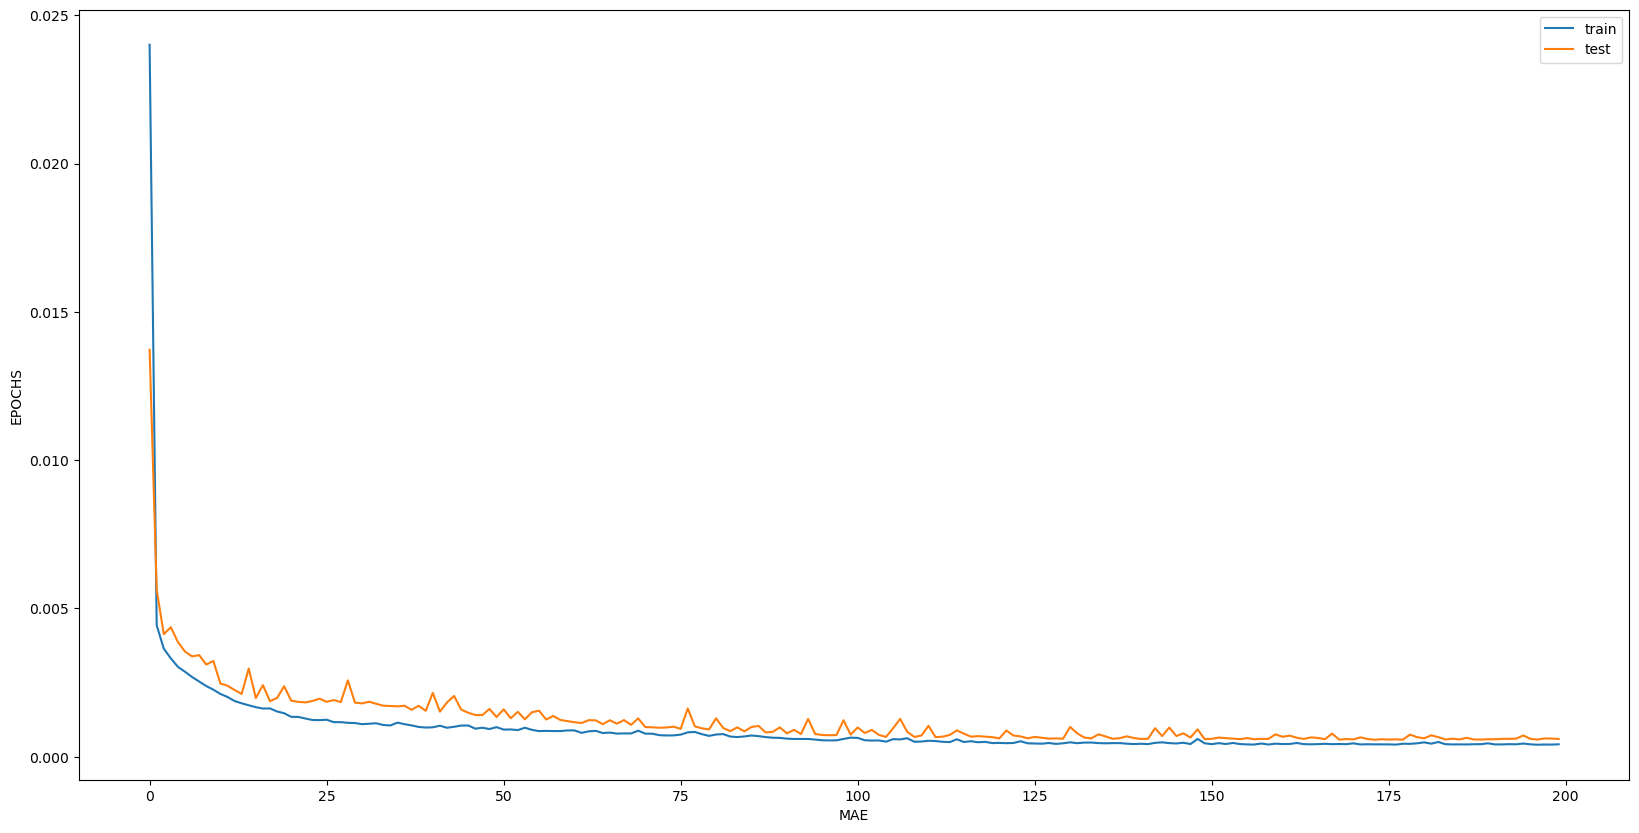

In [52]:
plotHistory(history)

#### Bivariate Model

In addition to the univariate method (above) This model also considers the volume of trading during the [LOOK_BACK] days before, to estimate the value of the index. 

In [75]:

global_data, size_train_data = selectData(type='bivariate') 
train_data,test_data = divideData(global_data, size_train_data)
scaler=MinMaxScaler(feature_range=(0,1))
scaler2=MinMaxScaler(feature_range=(0,1))
scaled_train_data=scaleData(train_data,scaler,scaler2)
x_train_data = createBivTrainVector(scaled_train_data, size_train_data)
y_train_data = createTargetVector(scaled_train_data[:,0])
test_data=global_data[size_train_data-LOOK_BACK:].values


scaled_test_data=scaleData(test_data,scaler,scaler2)
X_test = createBivTestVector(scaled_test_data)


In [76]:
print("x data\n")
print(x_train_data)
print("\ny data - target\n")
print(y_train_data)

x data

[[[0.66142175 0.67301952]
  [0.68277192 0.67909251]
  [0.6870217  0.68340401]
  ...
  [0.7391261  0.74104012]
  [0.74325226 0.73825795]
  [0.70506295 0.69318194]]

 [[0.68277192 0.67909251]
  [0.6870217  0.68340401]
  [0.67482836 0.67640097]
  ...
  [0.74325226 0.73825795]
  [0.70506295 0.69318194]
  [0.66141802 0.68682554]]

 [[0.6870217  0.68340401]
  [0.67482836 0.67640097]
  [0.69183795 0.69950199]
  ...
  [0.70506295 0.69318194]
  [0.66141802 0.68682554]
  [0.67749064 0.68383977]]

 ...

 [[0.50193644 0.26089088]
  [0.36386247 0.38219172]
  [0.30379262 0.32942184]
  ...
  [0.18506149 0.21018853]
  [0.37070155 0.41073661]
  [0.42877965 0.46205665]]

 [[0.36386247 0.38219172]
  [0.30379262 0.32942184]
  [0.39073879 0.23015061]
  ...
  [0.37070155 0.41073661]
  [0.42877965 0.46205665]
  [0.34610378 0.20667179]]

 [[0.30379262 0.32942184]
  [0.39073879 0.23015061]
  [0.21711326 0.27176673]
  ...
  [0.42877965 0.46205665]
  [0.34610378 0.20667179]
  [0.14928194 0.17612992]]]

y

In [77]:

lstm_biv_model = createLstmModel(x_train_data)
print(lstm_biv_model.summary())
history=trainLstmModel(lstm_biv_model, x_train_data, y_train_data)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 90, 50)            10600     
                                                                 
 lstm_9 (LSTM)               (None, 25)                7600      
                                                                 
 dense_4 (Dense)             (None, 1)                 26        
                                                                 
Total params: 18,226
Trainable params: 18,226
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/200
31/31 [==============================] - 4s 69ms/step - loss: 0.1104 - val_loss: 0.1228
Epoch 2/200
31/31 [==============================] - 2s 49ms/step - loss: 0.0307 - val_loss: 0.0687
Epoch 3/200
31/31 [==============================] - 2s 49ms/step - loss: 0.0247 - val_loss: 0.0721
Epoch 4/2

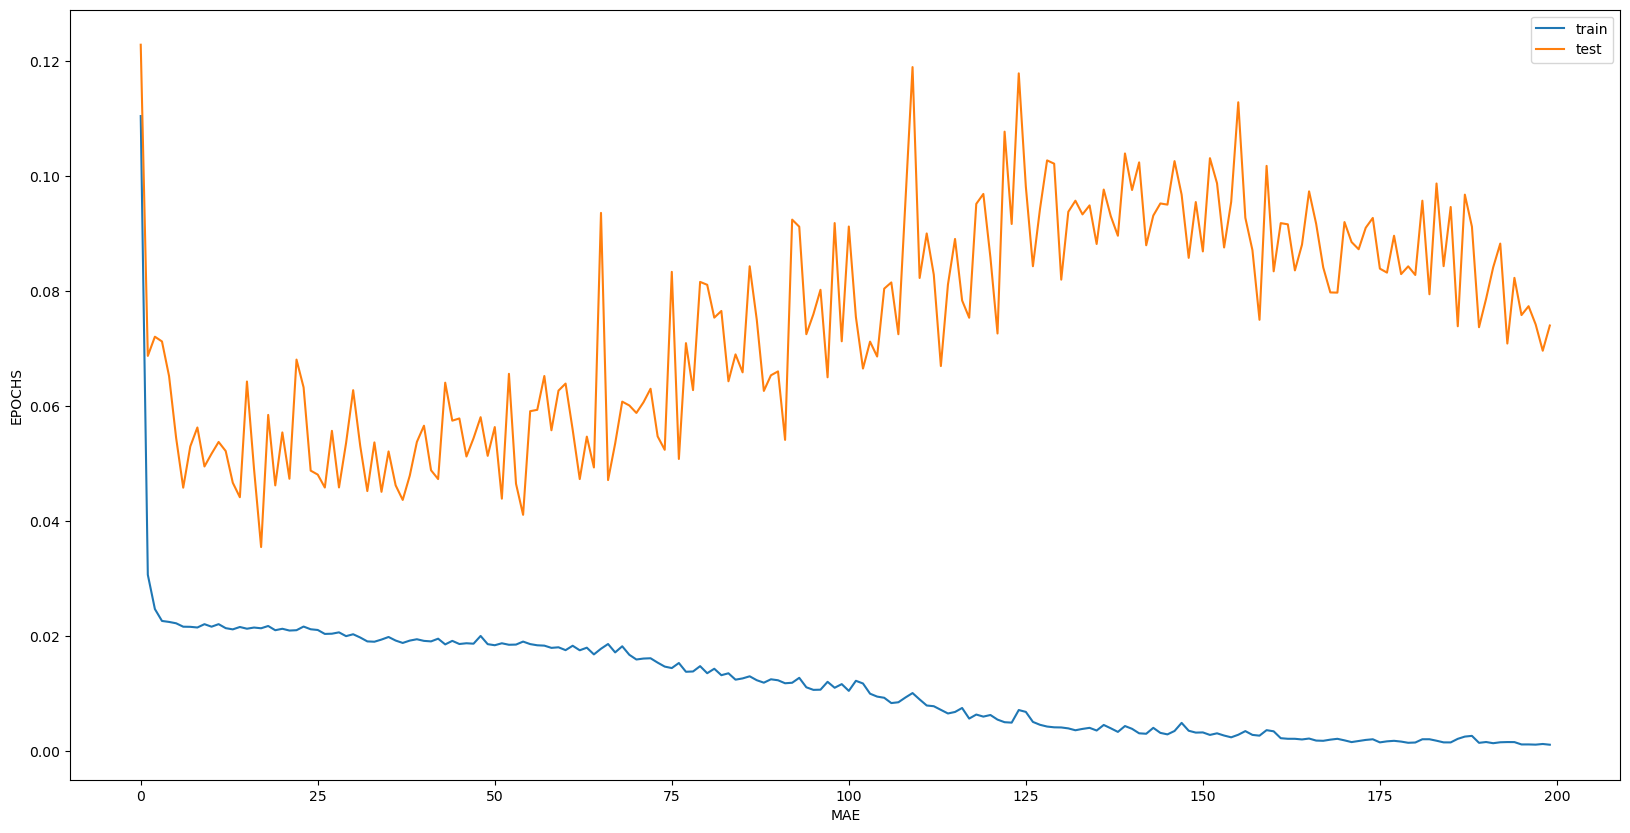

In [78]:

plotHistory(history)

#### Diff(log) model

This model works in similar way as the Linear univariate model. The difference is that the data is based on the difference of the logaritms between two consecutive days, providing insights on the daily variation in relation to the previous day.

In [ ]:
global_data, size_train_data = selectData(type='univariate') 
train_data,test_data = divideData(global_data, size_train_data)
#instead of scaled between 0 and 1, the data is "difflogged"
scaled_train_data=diffLogData(train_data)
x_train_data = createTrainVector(scaled_train_data, size_train_data)
x_train_data = x_train_data = x_train_data[:-1]
y_train_data = createTargetVector(scaled_train_data)
test_data=selectTestData(global_data,size_train_data)
scaled_test_data=diffLogData(test_data)
X_test = createTestVector(scaled_test_data)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 90, 50)            10600     
                                                                 
 lstm_3 (LSTM)               (None, 25)                7600      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 18,226
Trainable params: 18,226
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/200
31/31 [==============================] - 5s 77ms/step - loss: 0.1319 - val_loss: 0.1336
Epoch 2/200
31/31 [==============================] - 2s 51ms/step - loss: 0.0443 - val_loss: 0.0962
Epoch 3/200
31/31 [==============================] - 2s 50ms/step - loss: 0.0262 - val_loss: 0.1095
Epoch 4/2

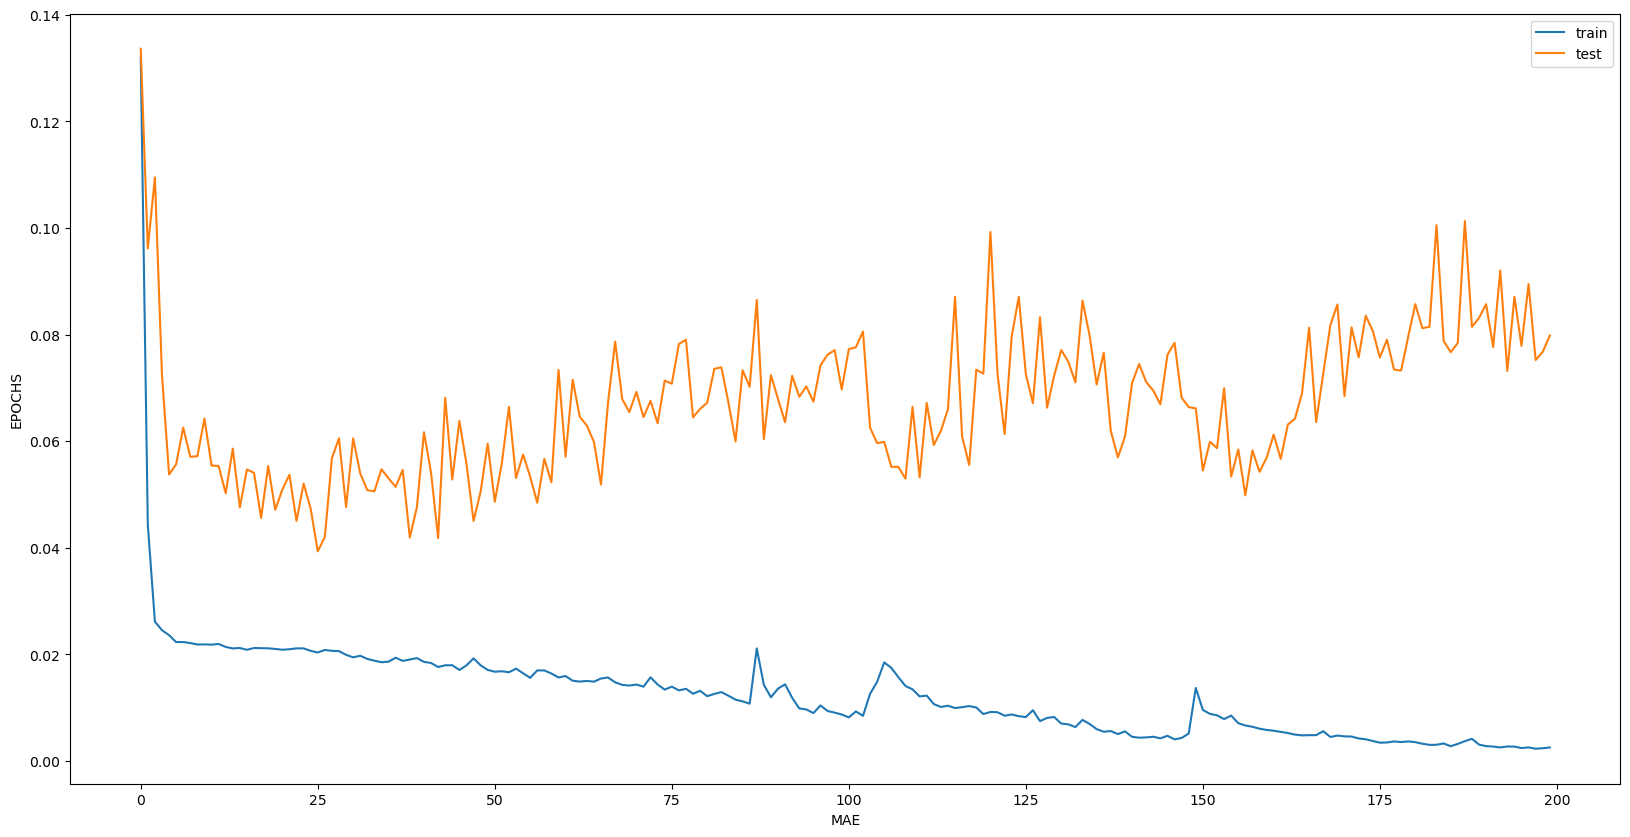

In [58]:
lstm_difflog_model = createLstmModel(x_train_data)
print(lstm_biv_model.summary())
history=trainLstmModel(lstm_difflog_model, x_train_data, y_train_data)      


In [ ]:
                        
plotHistory(history)

#### Classification Model (based on Diff(log) model)

In [119]:
df=df.truncate(after=pd.Timestamp('2022-02-01 00:00:00+00:00'))
global_data, size_train_data = selectData(type='univariate') 
train_data,test_data = divideData(global_data, size_train_data)
#instead of scaled between 0 and 1, the data is "difflogged"
scaled_train_data=diffLogData(train_data)
x_train_data = createTrainVector(scaled_train_data, size_train_data)
x_train_data = x_train_data[:-1]
y_train_data = createTargetClassVector(scaled_train_data, numCat=3)

test_data=selectTestData(global_data,size_train_data)
scaled_test_data=diffLogData(test_data)
X_test = createTestVector(scaled_test_data)


In [120]:
#Show how many observations are in each percentile

numCat=y_train_data.shape[1]
for i in range(0, numCat):
    print('percentile ' + str(i*int(100/numCat)) + ' = ' + str(np.count_nonzero(y_train_data[:,i] == 1)))


percentile 0 = 696
percentile 33 = 696
percentile 66 = 696


In [121]:
lstm_class_model = createLstmModel(x_train_data, y_train_data.shape[1])
print(lstm_class_model.summary())
print(len(x_train_data))
print("number of Epochs " + str(EPOCHS))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 90, 50)            10400     
                                                                 
 lstm_7 (LSTM)               (None, 25)                7600      
                                                                 
 dense_3 (Dense)             (None, 3)                 78        
                                                                 
Total params: 18,078
Trainable params: 18,078
Non-trainable params: 0
_________________________________________________________________
None
2088
number of Epochs 5


In [122]:

history = trainLstmModel(lstm_class_model, x_train_data, y_train_data)


Epoch 1/5
59/59 [==============================] - 6s 68ms/step - loss: 1.0990 - accuracy: 0.3209 - val_loss: 1.0988 - val_accuracy: 0.3206
Epoch 2/5
59/59 [==============================] - 3s 55ms/step - loss: 1.0989 - accuracy: 0.3140 - val_loss: 1.0989 - val_accuracy: 0.3206
Epoch 3/5
59/59 [==============================] - 3s 55ms/step - loss: 1.0987 - accuracy: 0.3353 - val_loss: 1.0993 - val_accuracy: 0.3206
Epoch 4/5
59/59 [==============================] - 3s 55ms/step - loss: 1.0988 - accuracy: 0.3321 - val_loss: 1.0990 - val_accuracy: 0.3110
Epoch 5/5
59/59 [==============================] - 3s 55ms/step - loss: 1.0987 - accuracy: 0.3321 - val_loss: 1.0997 - val_accuracy: 0.3206


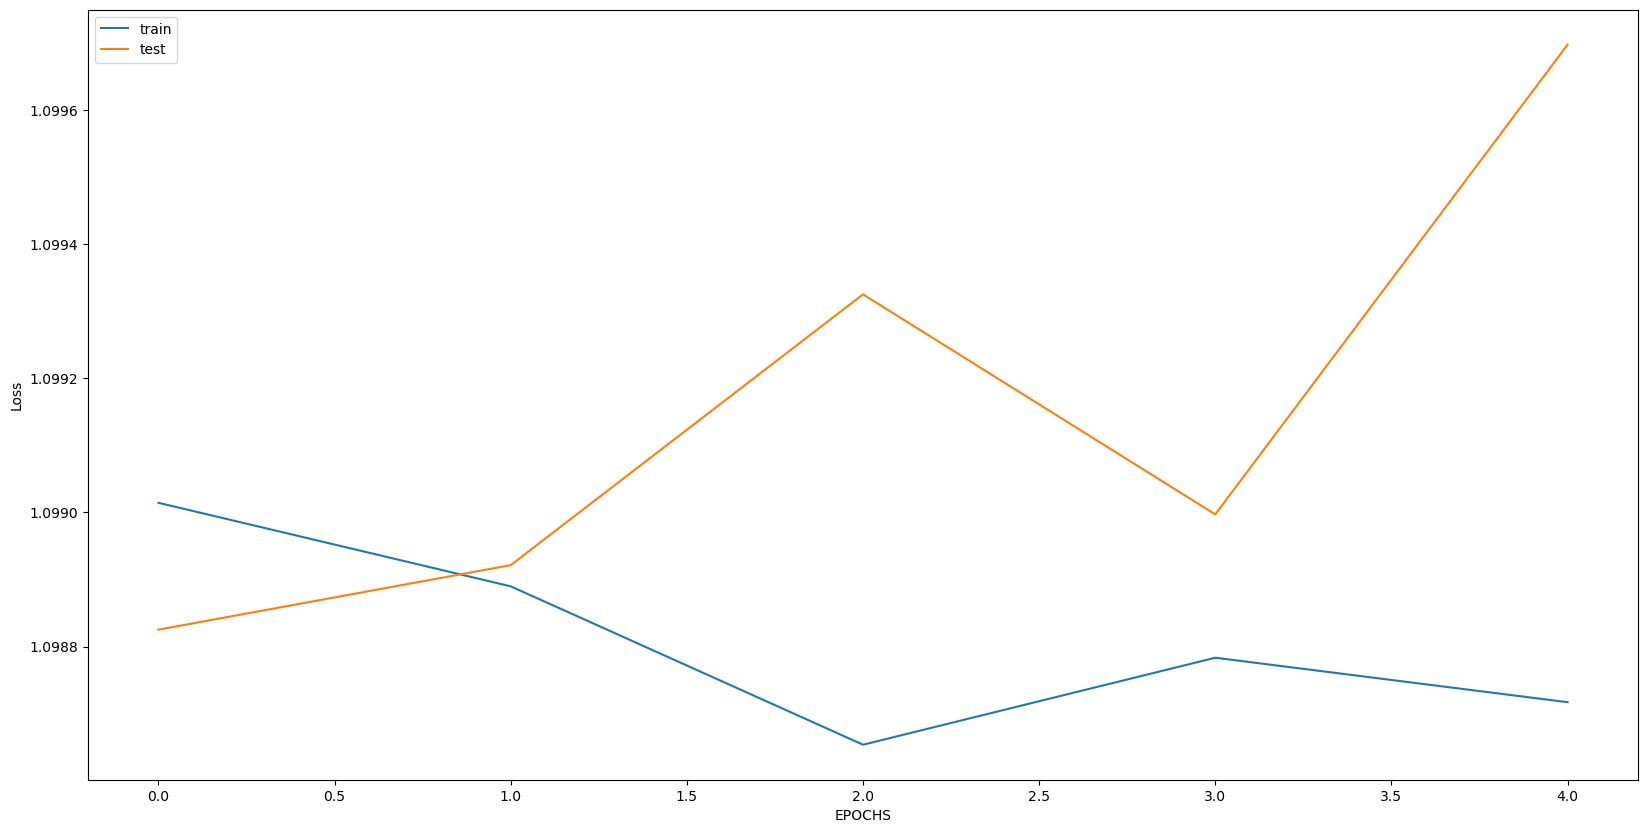

In [123]:
plotHistory(history, yaxis="Loss")


## Prediction

##### Prediction Benchmark

In [28]:

#%% Day - Before Prediction function
day_before_price=global_data.iloc[size_train_data-1:].copy()
day_before_price_copy = day_before_price.copy()


for i in range(1,day_before_price.size): 
        day_before_price['Close'][i] = day_before_price_copy['Close'][i-1].copy()

day_before_price=day_before_price.iloc[1:]

##### Evaluate Predictions:

In [30]:
def testPredictionsScore(data=test_data, type=""):
    
    if (type=="categorical"):
        data = data[LOOK_BACK+1:,0]
    else:
        data = data[LOOK_BACK:,0]
 

    print('==================================')
    testScore = np.sqrt(mean_squared_error(data, predicted_stock_price))
    print('Test Score: %.2f RMSE' % (testScore))
    print('==================================')    


In [31]:
def testDayBeforeScore():
    testScore = np.sqrt(mean_squared_error(global_data.iloc[size_train_data:], day_before_price['Close']))
    print('==================================')
    print('Test Score Day before: %.2f RMSE' % (testScore))
    print('==================================')

#### Plotting the results

In [32]:
def fillDataForPlotting (): 
    #Setting Vectors for plotting
    train_data = global_data.iloc[:size_train_data]
    test_data = global_data.iloc[size_train_data:]
    test_data = test_data.assign(Predictions=predicted_stock_price)
    test_data = test_data.assign(Day_Before=day_before_price)
    return train_data,test_data

In [33]:
def plotAllHistory (train_data,test_data): 
    #Plotting all history
    plt.plot(global_data["Close"], label='Historical Data')
    plt.plot(test_data["Close"], label='Observed Values', color="blue")
    plt.plot(test_data["Predictions"], label='Predicted Values', color="orange")
    #plt.plot(test_data["Day_Before"], label='Previous day', color="green")
    plt.title('PSI-20 Prediction')
    plt.xlabel('Time')
    plt.ylabel('PSI-20 Index')
    plt.legend()
    plt.show()  

In [34]:
def plotPredictedPeriod (train_data,test_data):
    #Plot predicted Period
    plt.plot(test_data["Close"], label='Observed Values', color="blue")
    plt.plot(test_data["Predictions"], label='Predicted Values', color="orange")
    plt.plot(test_data["Day_Before"], label='Previous day', color="green")
    plt.title('PSI-20 Prediction')
    plt.xlabel('Time')
    plt.ylabel('PSI-20 Index')
    plt.legend()
    plt.show()  


In [35]:
def plotResults():
    train_data,test_data = fillDataForPlotting();
    plotAllHistory(train_data,test_data);
    plotPredictedPeriod(train_data,test_data);


### Running Predictions

##### Linear Model

In [36]:
#Linear model
predicted_stock_price=lstm_model.predict(X_test)
predicted_stock_price=scaler.inverse_transform(predicted_stock_price)


2/2 [==============================] - 1s 12ms/step


In [39]:
testPredictionsScore()
testDayBeforeScore()


Test Score: 43.49 RMSE
Test Score Day before: 42.33 RMSE


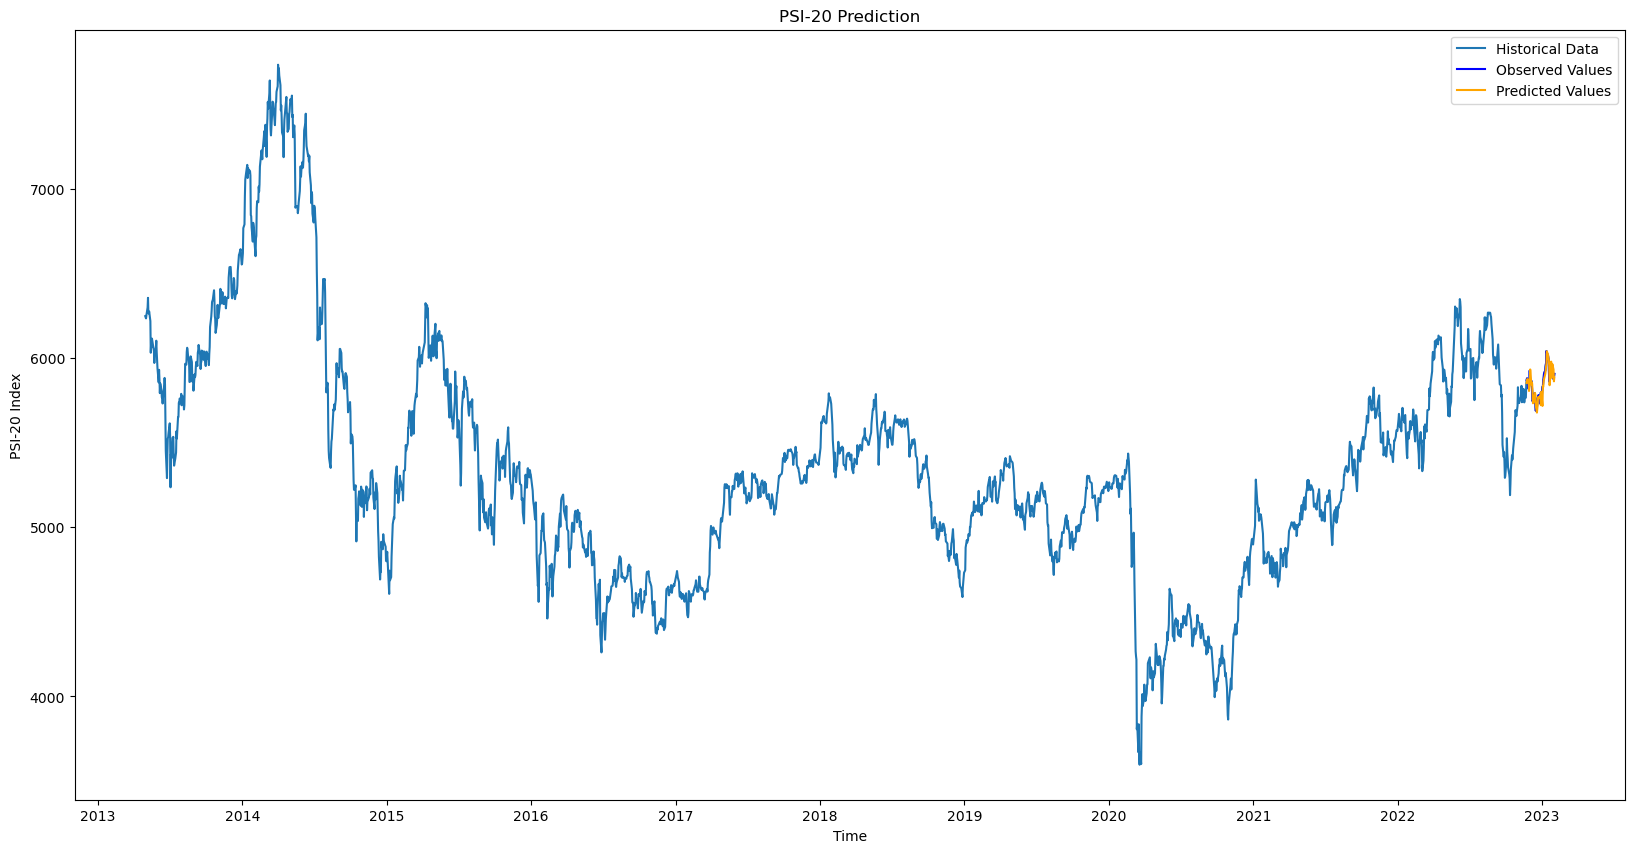

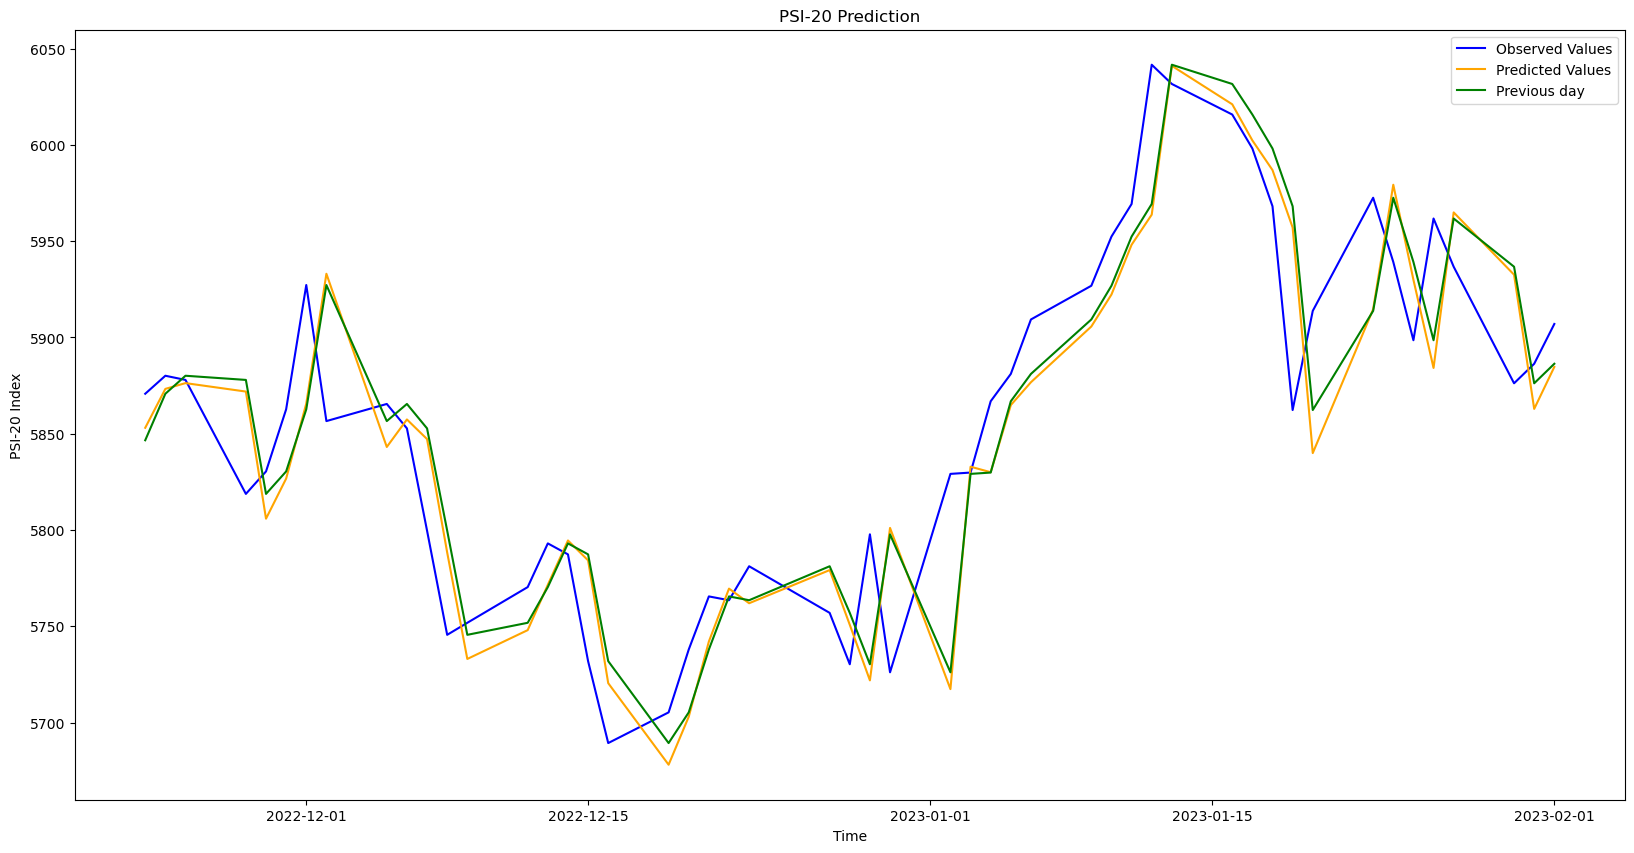

In [38]:
plotResults()

##### BivariateModel

In [79]:
#Bivariate model
predicted_stock_price=lstm_biv_model.predict(X_test)
predicted_stock_price=scaler.inverse_transform(predicted_stock_price)


2/2 [==============================] - 1s 14ms/step


In [80]:
testPredictionsScore()


Test Score: 323.32 RMSE


In [ ]:
testDayBeforeScore()

##### DiffLog Model

In [ ]:
#Difflog Model
predicted_stock_price=lstm_difflog_model.predict(X_test)

2/2 [==============================] - 1s 26ms/step


In [ ]:
testPredictionsScore(scaled_test_data)
#testDayBeforeScore()

Test Score: 0.01 RMSE


##### Classification Model

In [124]:
#Category Model
predicted_stock_cat=lstm_class_model.predict(X_test)
print("Test C3")

2/2 [==============================] - 1s 16ms/step
Test C3


In [125]:

predictions=np.argmax(predicted_stock_cat, axis=1)

In [126]:
print(predicted_stock_cat)
print(predictions)
##testPredictionsScore("categorical")


[[0.3347495  0.33788833 0.32736212]
 [0.33466488 0.3380409  0.32729417]
 [0.33474368 0.33790243 0.32735392]
 [0.33471885 0.3379351  0.327346  ]
 [0.33471686 0.33793494 0.32734826]
 [0.33465517 0.33805627 0.32728857]
 [0.33466193 0.33806485 0.32727328]
 [0.33465636 0.33808967 0.32725394]
 [0.33454853 0.33832014 0.3271313 ]
 [0.3344406  0.33859277 0.32696667]
 [0.33445203 0.33865622 0.32689166]
 [0.33445722 0.3387082  0.32683465]
 [0.3344976  0.338672   0.3268303 ]
 [0.33452436 0.33863625 0.3268394 ]
 [0.33458287 0.33852085 0.32689625]
 [0.33462086 0.33842218 0.32695687]
 [0.33461332 0.33840558 0.32698122]
 [0.33461082 0.33838966 0.32699946]
 [0.3346571  0.338282   0.32706088]
 [0.3346017  0.33836466 0.32703358]
 [0.33456215 0.33844575 0.32699212]
 [0.33448935 0.338611   0.3268996 ]
 [0.33446366 0.33870783 0.3268286 ]
 [0.33443698 0.3388073  0.32675567]
 [0.33441126 0.3389057  0.326683  ]
 [0.334401   0.338973   0.32662597]
 [0.3344154  0.33898416 0.32660046]
 [0.33443955 0.33896056 0.32

## Clear All

In [127]:
globals().clear

<function dict.clear>